In [2]:
# based on http://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html

# prepared dataset
from sklearn import datasets
# wy split with hands?
from sklearn.model_selection import train_test_split
# to search for hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Items type: <class 'numpy.ndarray'> (1797, 8, 8)


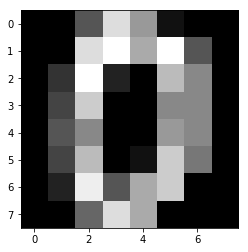

Now we have 1797 images flattened to 64-values vectors
Target ~ 0


In [3]:
# Loading Digits dataset
digits = datasets.load_digits()

print("Items type:", type(digits.images), digits.images.shape)

# show first image
plt.imshow(digits.images[0], cmap='gray')
plt.show()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
print("Now we have {} images flattened to {}-values vectors".format(*X.shape))
y = digits.target
print("Target ~", y[0])

In [4]:
# Split the dataset in two equal parts
# train for adjusting formula, test - for assessing result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
# hyper parameters
tuned_parameters = [
    {
        'n_neighbors': [3, 5, 7],
        'metric': ['manhattan', 'minkowski'],
    },
]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

scores = ['precision_macro', 'recall_macro', 'accuracy', 'f1_macro']  # _macro means macro averaged

for score in scores:
    print("# Tuning hyper-parameters for", score)
    print()
    
    # see other hyperparameters opimizers
    # http://scikit-learn.org/stable/modules/classes.html#hyper-parameter-optimizers
    
    clf = GridSearchCV(
            KNeighborsClassifier(),  # "dummy" kNN classifier model
            tuned_parameters,  # grid
            cv=5,              # cross-validation parameters
            scoring=score      # estimation of what
    )
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("{:.03f} (+/-{:.03f}) for {}".format(mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print("=====================================================")

# Tuning hyper-parameters for precision_macro

Best parameters set found on development set:

{'metric': 'minkowski', 'n_neighbors': 3}

Grid scores on development set:

0.984 (+/-0.008) for {'metric': 'manhattan', 'n_neighbors': 3}
0.985 (+/-0.013) for {'metric': 'manhattan', 'n_neighbors': 5}
0.981 (+/-0.014) for {'metric': 'manhattan', 'n_neighbors': 7}
0.987 (+/-0.003) for {'metric': 'minkowski', 'n_neighbors': 3}
0.986 (+/-0.008) for {'metric': 'minkowski', 'n_neighbors': 5}
0.986 (+/-0.009) for {'metric': 'minkowski', 'n_neighbors': 7}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       1.00      0.97      0.99        35
          2       0.97      1.00      0.99        36
          3       0.93      0.97      0.95        29
          4       1.00      0.97      0.98       

In [9]:
from sklearn.neural_network import MLPClassifier
# hyper parameters
tuned_parameters = [
    {
        'activation': ['relu'],
        'alpha': [0.00001, 0.0001, 0.001],
        'hidden_layer_sizes': [(10,), (64,), (32, 10)],
        'max_iter':[1000]
    },
]
clf = GridSearchCV(
        MLPClassifier(),   # "dummy" classifier model
        tuned_parameters,  # grid
        cv=5,              # cross-validation parameters
        scoring='accuracy' # estimation of what
)

# TODO: find and save the best ANN classifier for MNIST dataset

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'max_iter': 1000}
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        27
          1       0.89      0.91      0.90        35
          2       1.00      0.97      0.99        36
          3       0.97      1.00      0.98        29
          4       1.00      0.97      0.98        30
          5       0.97      0.95      0.96        40
          6       1.00      0.98      0.99        44
          7       0.95      0.97      0.96        39
          8       0.97      0.95      0.96        39
          9       0.91      0.95      0.93        41

avg / total       0.96      0.96      0.96       360

